In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import IPython

sns.set_theme() # Setting seaborn as default style

### Options

In [16]:
# Years of electricity map (EM) data that will be imported


# Features that will be extracted from the EM data and their shorter handel
features = {
    "power_production_wind_avg": "prod_wind",
    "power_production_solar_avg": "prod_solar"
}


## Import electricity data

In [3]:
# Import Electricity Map data
em_list = []

for year in years:
    em_list.append(pd.read_csv(f"..\data\electricity-map\ElectricityMap_DE_{year}.csv", sep=",",
                               parse_dates=["datetime"], index_col=["datetime"]))
em = pd.concat(em_list, axis=0, ignore_index=False, verify_integrity=True)
em.shape


(17544, 94)

In [39]:
# Import Electricity Map data
features = {
    "power_production_wind_avg": "prod_wind",
    "Solar": "prod_solar"
}
ec_list = []
years = [*range(2017, 2021)]
for year in years:
    ec_list.append(pd.read_csv(f"..\data\energy-charts\energy-charts_{year}.csv", sep=",",
                               parse_dates=["Datum (UTC)"], index_col=["Datum (UTC)"]))
ec = pd.concat(ec_list, axis=0, ignore_index=False, verify_integrity=True)

ec["power_production_wind_avg"] = 0
ec["power_production_wind_avg"] = ec["Wind Offshore"] + ec["Wind Onshore"]
ec = ec[ec.index.minute==0]
ec.shape

(35064, 19)

In [22]:
print(em.dtypes)
# print(em.columns)

NameError: name 'em' is not defined

In [5]:
# Is datetime in UTC? -> Does datetime match with timestamp?
# timestamp1 = data["datetime"].apply(pd.Timestamp.timestamp)
timestamp1 = em.index.to_series().apply(pd.Timestamp.timestamp)
timestamp2 = em["timestamp"].astype(float)

timestamp1.equals(timestamp2)

True

No time zone correction of datetime necessary.

## Extract relevant features

In [41]:
# extract the relevant data
df = pd.DataFrame(ec, columns=features.keys())
# rename columns
df = df.rename(columns=features)
df.head()

,prod_wind,prod_solar
Datum (UTC),,
2017-01-01 00:00:00+00:00,15498.0,0.0
2017-01-01 01:00:00+00:00,15406.9,0.0
2017-01-01 02:00:00+00:00,14922.3,0.0
2017-01-01 03:00:00+00:00,15022.0,0.0
2017-01-01 04:00:00+00:00,15234.0,0.0


## Statistics of the data

In [42]:
df.describe()

,prod_wind,prod_solar
count,35064.000000,35064.000000
mean,13237.375642,5182.592728
std,9703.304821,7975.357808
min,78.700000,0.000000
25%,5444.425000,0.000000
50%,10814.700000,76.000000
75%,18868.600000,8331.375000
max,45825.500000,36649.100000


In [43]:
df_2020 = pd.read_pickle("../data\data_prepared.pkl")
df_2020.describe()

,prod_wind,prod_solar,day_sin,day_cos,year_sin,year_cos,solar_el,solar_el_clip
count,17544.000000,17544.000000,1.754400e+04,1.754400e+04,17544.000000,17544.000000,17544.000000,17544.000000
mean,13886.152388,5268.331823,5.254954e-16,-8.604431e-15,0.000001,0.000705,0.314065,12.866426
std,10325.899628,8058.754017,7.071269e-01,7.071269e-01,0.706878,0.707376,30.398308,17.451226
min,135.750000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,-62.127703,0.000000
25%,5605.750000,0.000000,-7.071068e-01,-7.071068e-01,-0.706681,-0.706657,-21.792060,0.000000
50%,11166.250000,168.250000,2.009721e-14,-1.751680e-14,0.000391,0.001107,0.436741,0.436741
75%,20123.000000,8548.250000,7.071068e-01,7.071068e-01,0.706704,0.708222,22.601859,22.601859
max,46953.250000,36175.250000,1.000000e+00,1.000000e+00,1.000000,1.000000,62.033751,62.033751


In [44]:
# df_2017 = pd.read_pickle("../data\data_prepared_2017_2021.pkl")
# df_2017.describe()
# df=df_2017

## Plot data

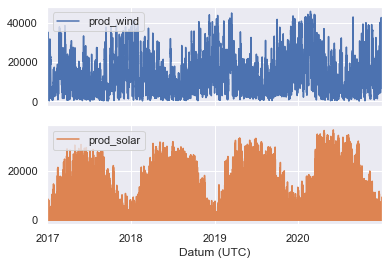

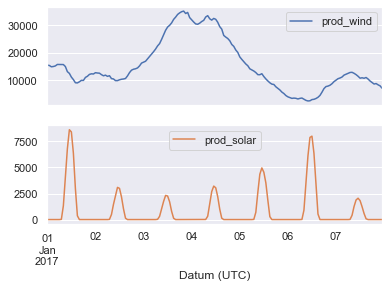

In [45]:
# plot whole year
df.plot(subplots=True)
# plot first 10 days
_ = df[0:7*24].plot(subplots=True)

## Determining the most important frequencies

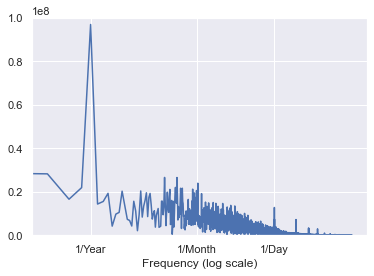

In [49]:
fft = np.fft.rfft(df["prod_wind"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df["prod_wind"])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.plot(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 10e7)
# plt.xlim(.5, max(plt.xlim()))
plt.xticks([1, 30.44, 365.2524],
           labels=['1/Year', '1/Month', '1/Day'])
_ = plt.xlabel('Frequency (log scale)')

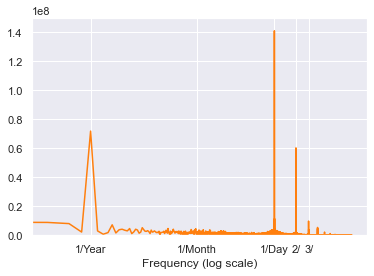

In [52]:
fft = np.fft.rfft(df["prod_solar"])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df["prod_solar"])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.plot(f_per_year, np.abs(fft), 'tab:orange')
plt.xscale('log')
plt.ylim(0, 15e7)
# plt.xlim([1, max(plt.xlim())])
plt.xticks([1, 30.44, 365.2524, 365.2524*2, 365.2524*3],
           labels=['1/Year', '1/Month', '1/Day', '2/', '3/'])
_ = plt.xlabel('Frequency (log scale)')

## Create periodical time signals

In [53]:
day_s = 24*60*60
year_s = (365.2425)*day_s
# timestamp_s = em["timestamp"]
timestamp_s=df.index.astype('int64') // 10**9

df["day_sin"] = np.sin(timestamp_s * (2 * np.pi / day_s))
df["day_cos"] = np.cos(timestamp_s * (2 * np.pi / day_s))
df["year_sin"] = np.sin(timestamp_s * (2 * np.pi / year_s))
df["year_cos"] = np.cos(timestamp_s * (2 * np.pi / year_s))

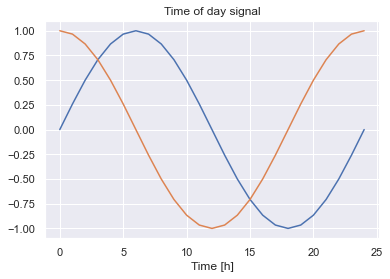

In [54]:
# plotting a day
plt.plot(np.array(df["day_sin"])[:25])
plt.plot(np.array(df["day_cos"])[:25])
plt.xlabel('Time [h]')
_ = plt.title('Time of day signal')

## Create solar elevation from ground
The angle varies with the location. We calculate a single feature for the [center of Germany](https://de.wikipedia.org/wiki/Mittelpunkte_Deutschlands) (♁51° 8′ 0″ N, 10° 25′ 0″ O, determined by the center of gravity of the surface 😉) and the [mean height of Germany](https://de.wikipedia.org/wiki/Liste_der_L%C3%A4nder_nach_durchschnittlicher_H%C3%B6he) (263 m)

In [55]:
import pvlib
from pvlib.location import Location

# create location object
site = Location(51.133, 10.416, altitude=263, tz="UTC", name='COG, Germany')

# estimate the solar position
solpos = site.get_solarposition(df.index)
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
Datum (UTC),,,,,,
2017-01-01 00:00:00+00:00,150.908284,150.908284,-60.908284,-60.908284,18.317213,-3.437913
2017-01-01 01:00:00+00:00,146.058615,146.058615,-56.058615,-56.058615,43.235850,-3.457635
2017-01-01 02:00:00+00:00,138.554986,138.554986,-48.554986,-48.554986,62.309903,-3.477348
2017-01-01 03:00:00+00:00,129.734647,129.734647,-39.734647,-39.734647,77.172490,-3.497051
2017-01-01 04:00:00+00:00,120.400744,120.400744,-30.400744,-30.400744,89.630477,-3.516745


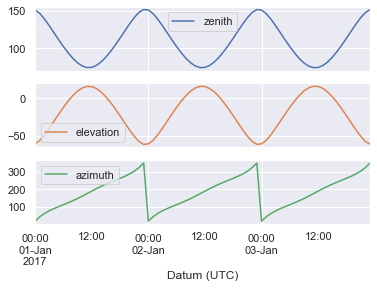

In [56]:
# plot features
_ = solpos.iloc[:72][["zenith", "elevation", "azimuth"]].plot(subplots=True)

In [57]:
# append solar elevation to dataframe
df["solar_el"] = solpos["elevation"]

# clip elevation below zero?
df["solar_el_clip"] = df["solar_el"].clip(lower=0)

In [58]:
df.head()

,prod_wind,prod_solar,day_sin,day_cos,year_sin,year_cos,solar_el,solar_el_clip
Datum (UTC),,,,,,,,
2017-01-01 00:00:00+00:00,15498.0,0.0,2.504006e-13,1.000000,0.010364,0.999946,-60.908284,0.0
2017-01-01 01:00:00+00:00,15406.9,0.0,2.588190e-01,0.965926,0.011081,0.999939,-56.058615,0.0
2017-01-01 02:00:00+00:00,14922.3,0.0,5.000000e-01,0.866025,0.011798,0.999930,-48.554986,0.0
2017-01-01 03:00:00+00:00,15022.0,0.0,7.071068e-01,0.707107,0.012515,0.999922,-39.734647,0.0
2017-01-01 04:00:00+00:00,15234.0,0.0,8.660254e-01,0.500000,0.013231,0.999912,-30.400744,0.0


## Preview of data normalization
We can't do this in this notebook yet, since all the data should be normalized over the training set and not the whole set (so the network doen't get an implicit preview of test values during training).

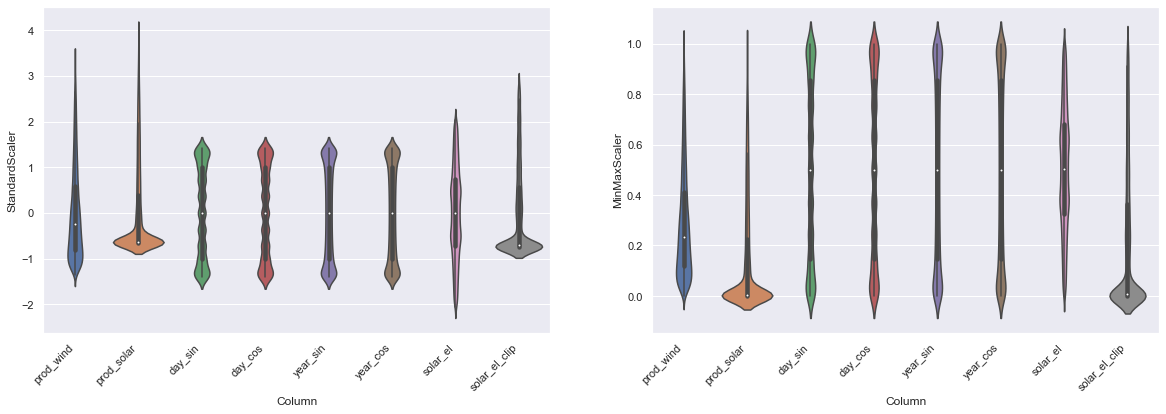

In [59]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Standardize dataframe
df_std = pd.DataFrame(StandardScaler().fit_transform(df),
                      columns=df.columns, index=df.index)
# Rescale / min-max normalize dataframe
df_scl = pd.DataFrame(MinMaxScaler().fit_transform(df),
                      columns=df.columns, index=df.index)

# plot normalizations
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.violinplot(ax=axes[0], x='Column', y='StandardScaler',
               data=df_std.melt(var_name='Column', value_name='StandardScaler'))
sns.violinplot(ax=axes[1], x='Column', y='MinMaxScaler',
               data=df_scl.melt(var_name='Column', value_name='MinMaxScaler'))
axes[0].set_xticklabels(df.keys(), rotation=45, ha="right")
_ = axes[1].set_xticklabels(df.keys(), rotation=45, ha="right")


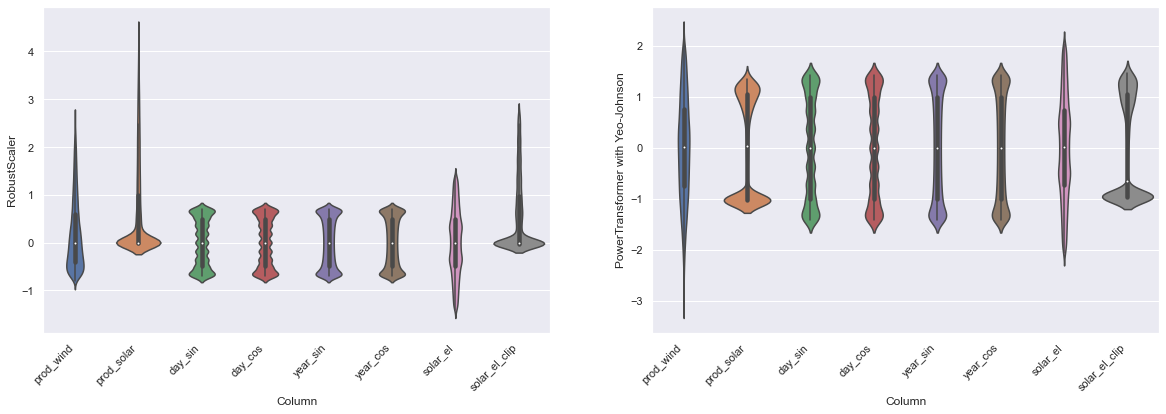

In [60]:
from sklearn.preprocessing import RobustScaler, PowerTransformer

sns.set()  # Setting seaborn as default style even if use only matplotlib
# Scale with the RobustScaler
df_rob = pd.DataFrame(RobustScaler().fit_transform(df),
                      columns=df.columns, index=df.index)
# Transform to Gaussian Distribution with Yeo-Johnson
df_tyj = pd.DataFrame(PowerTransformer(method="yeo-johnson").fit_transform(df),
                      columns=df.columns, index=df.index)

# plot normalizations
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharex=True)
sns.violinplot(ax=axes[0], x='Column', y='RobustScaler',
               data=df_rob.melt(var_name='Column', value_name='RobustScaler'))
sns.violinplot(ax=axes[1], x='Column', y='PowerTransformer with Yeo-Johnson',
               data=df_tyj.melt(var_name='Column', value_name='PowerTransformer with Yeo-Johnson'))
axes[0].set_xticklabels(df.keys(), rotation=45, ha="right")
_ = axes[1].set_xticklabels(df.keys(), rotation=45, ha="right")


## Find correlations

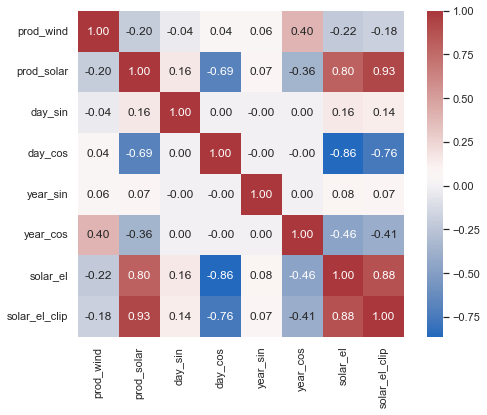

In [61]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
cmap = sns.color_palette("vlag", as_cmap=True)
_ = sns.heatmap(corr, cmap=cmap, annot=True, fmt=".2f", square=True)

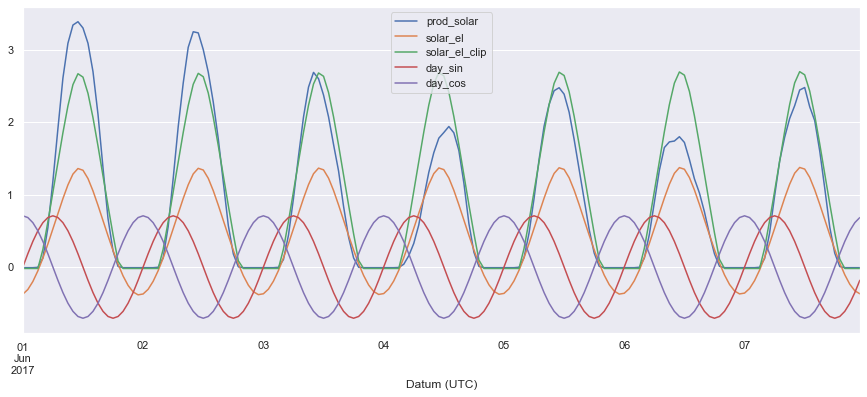

In [63]:
_ = df_rob.loc["2017-06-01":"2017-06-7"][["prod_solar", "solar_el", "solar_el_clip", "day_sin", "day_cos"]].plot(figsize=(15,6))

## Data Export

In [21]:
# export data
# df.to_pickle("../data/data_prepared.pkl")